In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Loading dataset

In [3]:
data = pd.read_csv("loan_preprocessed_data.csv")
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [4]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
X = data.drop("Loan_Status", axis = 1)
y = data.Loan_Status

### Creating training and validation sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=True)

In [7]:
print(f"Train data shape: {X_train.shape} \n Test data shape: {X_test.shape}")

Train data shape: (460, 11) 
 Test data shape: (154, 11)


### Defining the model architecture

In [1]:
import keras
print("Keras version: ", keras.__version__)
# print("tensorflow version: ", tensorflow.__version__)

In [11]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense


In [13]:
# defining the layers
input_neurons = X_train.shape[1]
output_neurons = 1
no_of_hidden_layers = 2
neurons_hidden_layer_1 = 10
neurons_hidden_layer_2 = 5

#defining the activation functions
#hidden layers have relu activation function and since output is binary classficiation
# output layer has sigmoid activation function

#model architecture

model = Sequential()
model.add(InputLayer(input_shape = (input_neurons,)))
model.add(Dense(units = neurons_hidden_layer_1, activation="relu"))
model.add(Dense(units=neurons_hidden_layer_2, activation = "relu"))
model.add(Dense(units = output_neurons, activation = "sigmoid"))

c:\Users\scientist-ns\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

### Compiling the model - Defining the loss fucntion and optimizer

In [15]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

### Training the model

In [34]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 1000)

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8321 - loss: 0.4288 - val_accuracy: 0.7727 - val_loss: 0.5482
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8433 - loss: 0.4026 - val_accuracy: 0.7727 - val_loss: 0.5491
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8164 - loss: 0.4323 - val_accuracy: 0.7662 - val_loss: 0.5487
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8233 - loss: 0.4354 - val_accuracy: 0.7792 - val_loss: 0.5504
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8268 - loss: 0.4211 - val_accuracy: 0.7727 - val_loss: 0.5507
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8398 - loss: 0.4076 - val_accuracy: 0.7727 - val_loss: 0.5508
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8104 - loss: 0.4357 - val_accuracy: 0.7727 - val_loss: 0.5516
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8017 - loss: 0.4649 - val_accuracy: 0.

### Evaluating model performance on training and validation data

In [35]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, classes_x)

0.3181818181818182

In [37]:
model_history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs = 1000)

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8537 - loss: 0.3065 - val_accuracy: 0.7662 - val_loss: 0.7153
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8599 - loss: 0.3101 - val_accuracy: 0.7338 - val_loss: 0.7103
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.3488 - val_accuracy: 0.7597 - val_loss: 0.7116
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8470 - loss: 0.3439 - val_accuracy: 0.7597 - val_loss: 0.7117
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8550 - loss: 0.3359 - val_accuracy: 0.7468 - val_loss: 0.7070
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8581 - loss: 0.3358 - val_accuracy: 0.7597 - val_loss: 0.7134
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8520 - loss: 0.3401 - val_accuracy: 0.7532 - val_loss: 0.7078
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8658 - loss: 0.3104 - val_accuracy: 0.

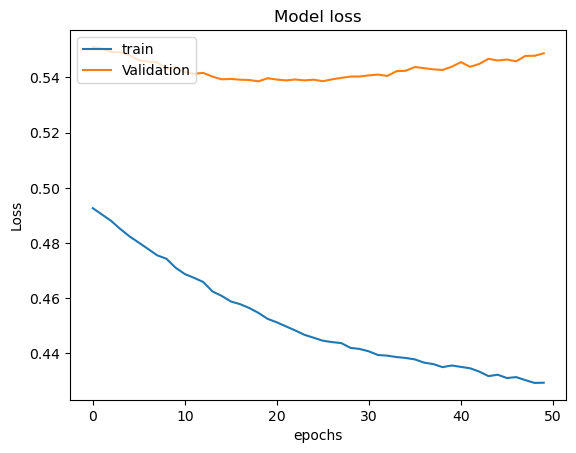

In [31]:
import matplotlib.pyplot as plt
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(["train","Validation"], loc = "upper left")
plt.show()

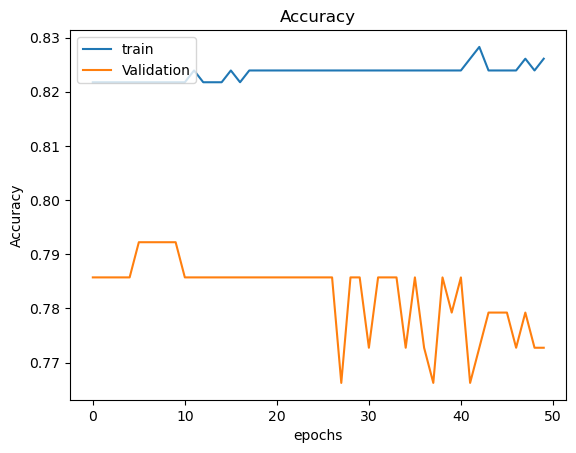

In [33]:
import matplotlib.pyplot as plt
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(["train","Validation"], loc = "upper left")
plt.show()